# Regression model

In [1]:
# import required libaries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
#read data

In [2]:
# loading the data set
df = pd.read_csv("shopping_trends_modified_test.xls")

In [3]:
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0,1.0,NaN,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,1,2.0,19.0,Male,Sweater,Clothing,64.0,NaN,L,Maroon,Winter,3.1,Yes,NaN,Express,Yes,Yes,2.0,Cash,Fortnightly
2,2,NaN,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,NaN,Free Shipping,Yes,NaN,23.0,Credit Card,Weekly
3,3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,NaN,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,NaN,Weekly
4,4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [4]:
df.shape

(4095, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4095 non-null   int64  
 1   Customer ID               3673 non-null   float64
 2   Age                       3711 non-null   float64
 3   Gender                    3716 non-null   object 
 4   Item Purchased            3689 non-null   object 
 5   Category                  3666 non-null   object 
 6   Purchase Amount (USD)     3714 non-null   float64
 7   Location                  3701 non-null   object 
 8   Size                      3713 non-null   object 
 9   Color                     3679 non-null   object 
 10  Season                    3718 non-null   object 
 11  Review Rating             3720 non-null   float64
 12  Subscription Status       3708 non-null   object 
 13  Payment Method            3684 non-null   object 
 14  Shipping

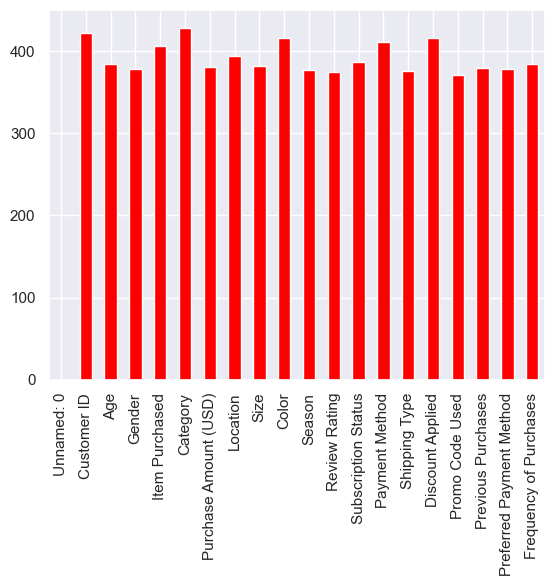

In [6]:
# view  features with missing values()
df.isna().sum().plot(kind="bar" , color="red")
plt.show()

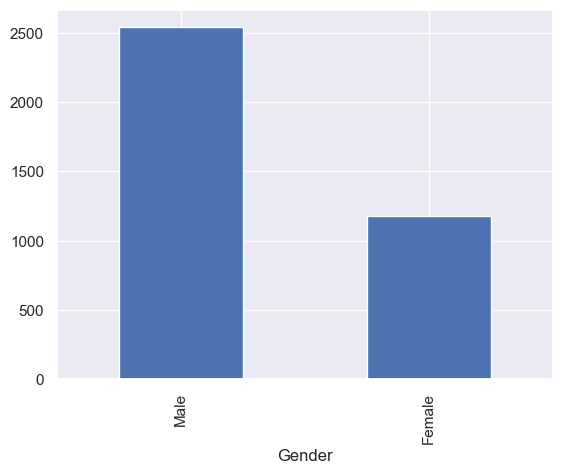

In [7]:
# viewing uncertain values of the target variable
df["Gender"].value_counts().sort_values(ascending=False)[:10].plot(kind="bar")
plt.show()

Data Wrangling

In [8]:
# filling missing values
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0,1.0,32.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,1,2.0,19.0,Male,Sweater,Clothing,64.0,Montana,L,Maroon,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,2.0,Cash,Fortnightly
2,2,118.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Credit Card,Free Shipping,Yes,No,23.0,Credit Card,Weekly
3,3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Fall,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


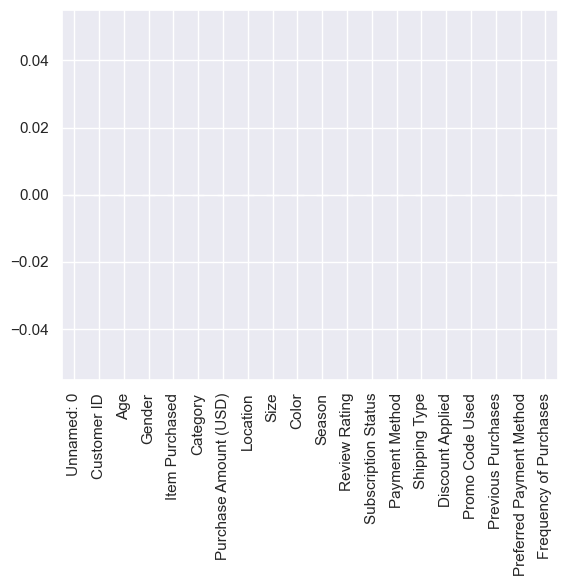

In [9]:
# view  features with missing values()
df.isna().sum().plot(kind="bar" , color="red")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4095 non-null   int64  
 1   Customer ID               4095 non-null   float64
 2   Age                       4095 non-null   float64
 3   Gender                    4095 non-null   object 
 4   Item Purchased            4095 non-null   object 
 5   Category                  4095 non-null   object 
 6   Purchase Amount (USD)     4095 non-null   float64
 7   Location                  4095 non-null   object 
 8   Size                      4095 non-null   object 
 9   Color                     4095 non-null   object 
 10  Season                    4095 non-null   object 
 11  Review Rating             4095 non-null   float64
 12  Subscription Status       4095 non-null   object 
 13  Payment Method            4095 non-null   object 
 14  Shipping

In [11]:
# drop unnecessary data
df.drop(["Gender","Item Purchased",
       "Category",
        "Location","Size","Color" ,"Season","Subscription Status","Payment Method",
        "Shipping Type","Discount Applied","Promo Code Used","Frequency of Purchases","Preferred Payment Method"],axis=1, inplace = True)

In [12]:
# dropping rows of uncertain values of the target variable 
index_names =df[df["Review Rating"]==0].index
df.drop(index_names,inplace= True)
index_names =df[df["Review Rating"]==1].index
df.drop(index_names,inplace= True)

In [13]:
# table statistics
df.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.00000
mean,2047.000000,1755.840049,42.911355,62.980220,3.773138,25.82442
std,1182.269005,1200.650495,14.853830,24.720467,0.688503,13.84458
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.00000
25%,1023.500000,638.000000,32.000000,41.000000,3.200000,14.00000
50%,2047.000000,1709.000000,41.000000,64.000000,3.900000,28.00000
75%,3070.500000,2803.500000,56.000000,87.000000,4.300000,36.00000
max,4094.000000,3900.000000,70.000000,100.000000,5.000000,50.00000


In [14]:
df.head()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0,1.0,32.0,53.0,3.1,14.0
1,1,2.0,19.0,64.0,3.1,2.0
2,2,118.0,50.0,73.0,3.1,23.0
3,3,4.0,21.0,90.0,3.5,49.0
4,4,5.0,45.0,49.0,2.7,31.0


preparing data for modeling

In [15]:
# get your target variable
Features = df.drop(["Review Rating"],axis = 1 )
y= df["Review Rating"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4095 non-null   int64  
 1   Customer ID            4095 non-null   float64
 2   Age                    4095 non-null   float64
 3   Purchase Amount (USD)  4095 non-null   float64
 4   Review Rating          4095 non-null   float64
 5   Previous Purchases     4095 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 192.1 KB


In [17]:
# get dummy variable
X = pd.get_dummies(Features, columns =["Customer ID","Age","Purchase Amount (USD)","Previous Purchases"])

In [18]:
from sklearn .model_selection import train_test_split
#split data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [19]:
from sklearn .model_selection import train_test_split
#split data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

# Linear Regression Model Prediction

In [20]:
# import required libraries for building models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn import metrics
model=LinearRegression()
# fit the model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# get metric scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
lr_r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae) )
print("MAPE is {}".format(mape) )
print("MSE is {}".format(mse) )
print("R2 score is {}".format(lr_r2))
print("RMSE score is {}".format(rmse))

MAE is 290096.2658050804
MAPE is 77973.13859444969
MSE is 7407442183152.607
R2 score is -16336077088327.62
RMSE score is 2721661.658463926


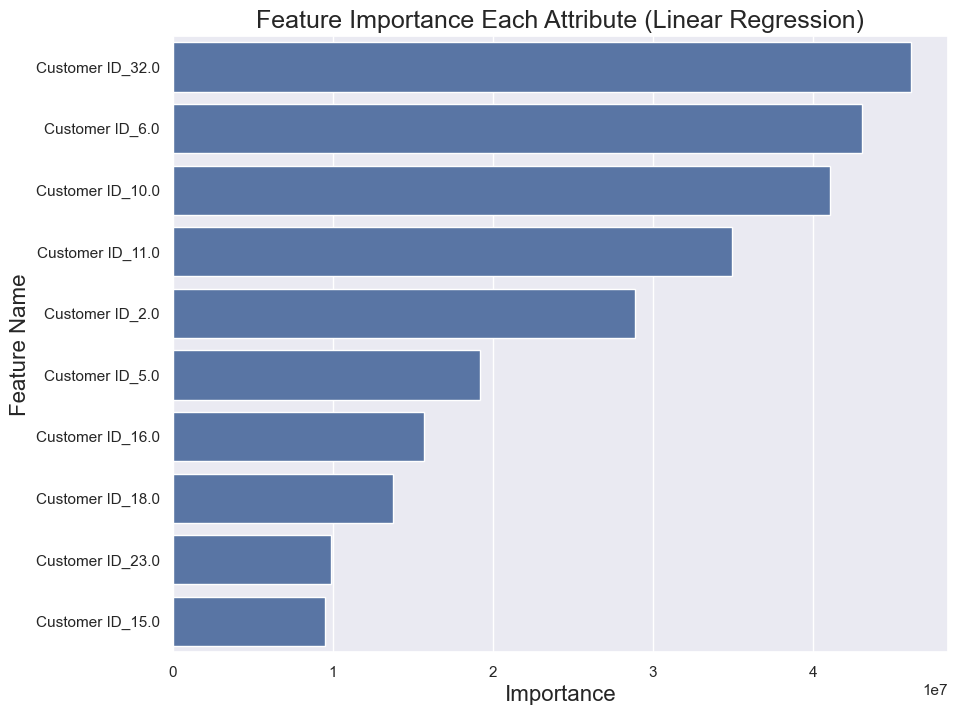

In [21]:
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": np.abs(model.coef_)

})

# Sort by importance (absolute value of coefficients)
fi = imp_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features

fi2 = fi.head(10)

# Plot the feature importance

plt.figure(figsize=(10, 8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attribute (Linear Regression)", fontsize=18)
plt.xlabel("Importance", fontsize=16)

plt.ylabel("Feature Name", fontsize=16)

plt.show()

In [22]:
X_test["lr_Review Rating Predictions"] = y_pred
df_sales=X_test
df_sales.head(10)

,Unnamed: 0,Customer ID_1.0,Customer ID_2.0,Customer ID_4.0,Customer ID_5.0,Customer ID_6.0,Customer ID_7.0,Customer ID_8.0,Customer ID_9.0,Customer ID_10.0,...,Previous Purchases_42.0,Previous Purchases_43.0,Previous Purchases_44.0,Previous Purchases_45.0,Previous Purchases_46.0,Previous Purchases_47.0,Previous Purchases_48.0,Previous Purchases_49.0,Previous Purchases_50.0,lr_Review Rating Predictions
582,582,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2339.123267
1961,1961,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-2338.277521
1957,1957,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2338.317249
3193,3193,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2337.737501
3817,3817,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2338.059165
2205,2205,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2337.689403
581,581,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-51395.332901
3778,3778,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2337.283320
3391,3391,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-2338.033797
311,311,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,63850.828767


In [23]:
# dropping logistic regression sales prediction to view decision trees regression sales prediction
df_sales.drop(["lr_Review Rating Predictions"] , axis = 1 ,inplace=True)

# Decision tree Model Regression prediction

In [24]:
# import required libraries
from sklearn.tree import DecisionTreeRegressor
# get estmators
dtree = DecisionTreeRegressor(random_state=0, max_depth=None, max_features="sqrt", min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_features='sqrt', random_state=0)

In [25]:
DecisionTreeRegressor(max_features='auto', random_state=0)

DecisionTreeRegressor(max_features='auto', random_state=0)

In [26]:
DecisionTreeRegressor(max_features="auto", random_state=0)
from sklearn import metrics
import math

y_pred = dtree.predict(X_test)
#get scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
dtree_r2 = metrics.r2_score(y_test, y_pred)

rmse = math.sqrt(mse)



print("MAE is {}".format(mae))
print("MSE is {}".format(mse) )
print("R2 score is {}".format(dtree_r2))
print("RMSE score is {}".format(rmse) )

MAE is 0.687306753458096
MSE is 0.741440195280716
R2 score is -0.6351425886305386
RMSE score is 0.8610692163123218


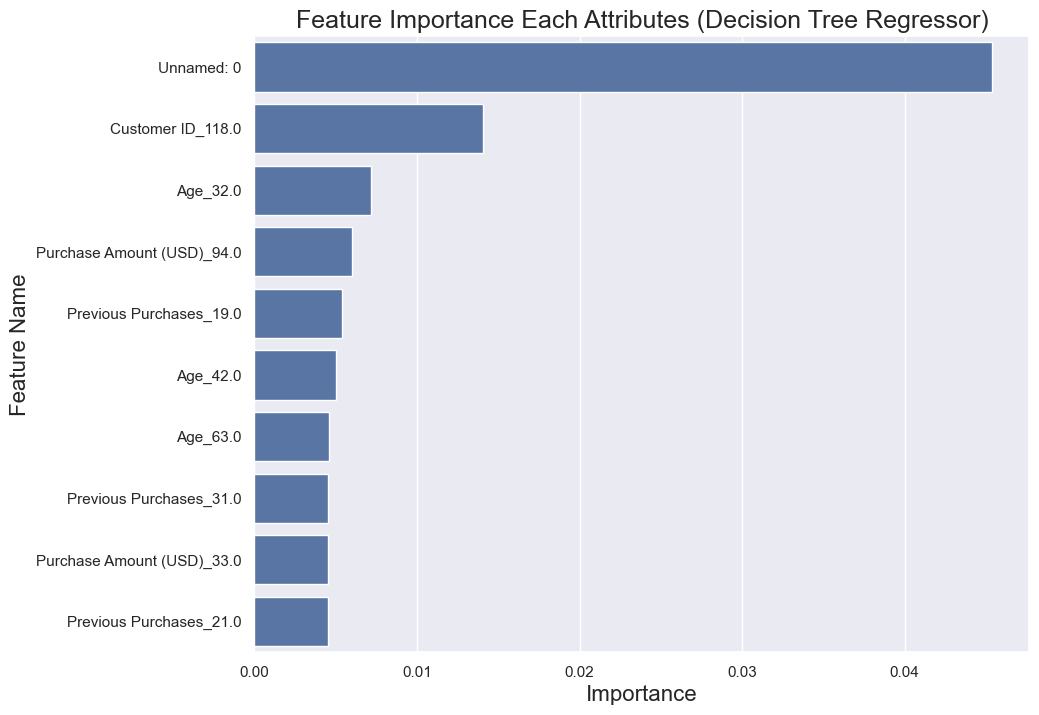

In [27]:
# plot model
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": dtree.feature_importances_

})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attributes (Decision Tree Regressor)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)

plt.ylabel ("Feature Name", fontsize=16)

plt.show()

In [28]:
X_test["dtree_sales_price Predictions"] = y_pred
df_sales=X_test
df_sales.head(10)

,Unnamed: 0,Customer ID_1.0,Customer ID_2.0,Customer ID_4.0,Customer ID_5.0,Customer ID_6.0,Customer ID_7.0,Customer ID_8.0,Customer ID_9.0,Customer ID_10.0,...,Previous Purchases_42.0,Previous Purchases_43.0,Previous Purchases_44.0,Previous Purchases_45.0,Previous Purchases_46.0,Previous Purchases_47.0,Previous Purchases_48.0,Previous Purchases_49.0,Previous Purchases_50.0,dtree_sales_price Predictions
582,582,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0
1961,1961,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,4.0
1957,1957,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.9
3193,3193,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.3
3817,3817,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.7
2205,2205,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.8
581,581,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.3
3778,3778,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.5
3391,3391,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.1
311,311,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0


In [29]:
# dropping decision regression sales prediction to view random forest sales prediction
df_sales.drop(["dtree_sales_price Predictions"] , axis = 1 ,inplace=True)

# Random Forest Regression Model Prediction

In [30]:
# import required libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
#fit model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [31]:
RandomForestRegressor(random_state=0)

RandomForestRegressor(random_state=0)

In [32]:
# import required libraries
from sklearn import metrics

from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
# get metric score
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rf_r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae) )
print("MAPE is {}".format(mape) )
print("MSE is {}".format(mse) )
print("R2 score is {}".format(rf_r2))
print("RMSE score is {}".format(rmse))

MAE is 0.581493897477624
MAPE is 0.1638359927014015
MSE is 0.48827853051261183
R2 score is -0.07682996610781823
RMSE score is 0.6987692970592024


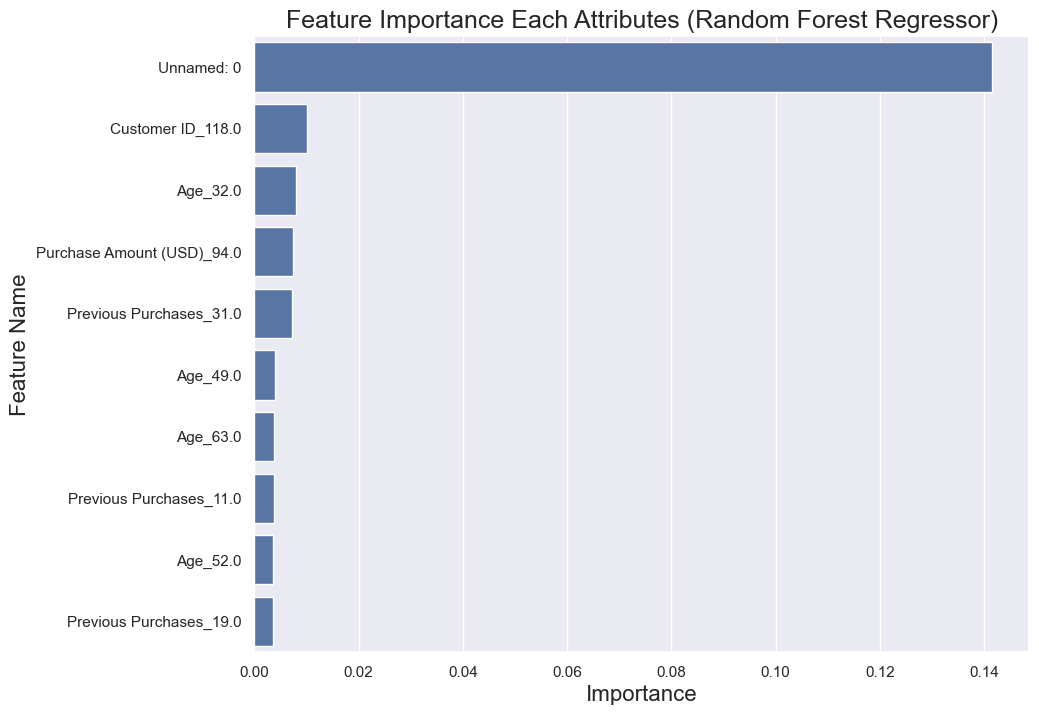

In [33]:
#plot model
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": rf.feature_importances_

})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attributes (Random Forest Regressor)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)

plt.ylabel ("Feature Name", fontsize=16)

plt.show()

In [34]:
X_test["rf_Review Rating Predictions"] = y_pred
df_sales=X_test
df_sales.head(10)

,Unnamed: 0,Customer ID_1.0,Customer ID_2.0,Customer ID_4.0,Customer ID_5.0,Customer ID_6.0,Customer ID_7.0,Customer ID_8.0,Customer ID_9.0,Customer ID_10.0,...,Previous Purchases_42.0,Previous Purchases_43.0,Previous Purchases_44.0,Previous Purchases_45.0,Previous Purchases_46.0,Previous Purchases_47.0,Previous Purchases_48.0,Previous Purchases_49.0,Previous Purchases_50.0,rf_Review Rating Predictions
582,582,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.761
1961,1961,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,3.919
1957,1957,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.922
3193,3193,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.668
3817,3817,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.656
2205,2205,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.836
581,581,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.707
3778,3778,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.725
3391,3391,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.742
311,311,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.785


In [35]:
# dropping decision regression sales prediction to view best sales prediction
df_sales.drop(["rf_Review Rating Predictions"] , axis = 1 ,inplace=True)

In [36]:
table1=pd.DataFrame({"lr_R2_score" : lr_r2  , "dtree_R2_score":dtree_r2 ,"rf_R2_score":rf_r2},index=[0])
table1

,lr_R2_score,dtree_R2_score,rf_R2_score
0,-1.633608e+13,-0.635143,-0.07683


# Linear Regression Sales pricing prediction model Table 

In [37]:
table0=pd.DataFrame({"actual price" : y_test  , "BEST PREDICTED SALES PRICE":model.predict(X_test)})

In [38]:
table0.head(10)

,actual price,BEST PREDICTED SALES PRICE
582,4.9,-2339.123267
1961,2.6,-2338.277521
1957,4.5,-2338.317249
3193,4.0,-2337.737501
3817,2.6,-2338.059165
2205,2.7,-2337.689403
581,2.7,-51395.332901
3778,2.9,-2337.283320
3391,3.7,-2338.033797
311,4.1,63850.828767
